# 1. 데이터 정리

In [1]:
import pandas as pd

In [2]:
stb_df = pd.read_csv('D:/0_zerobase/ds_study/data/starbucks.csv', encoding='utf-8', index_col=0)
stb_df.tail()

title                                address        lat         lng   gu
605  사가정역                      서울특별시 중랑구 면목로 310  37.579594  127.087966  중랑구
606   상봉역                서울특별시 중랑구 망우로 307 (상봉동)  37.596890  127.086470  중랑구
607    묵동  서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층  37.615368  127.076633  중랑구
608   양원역              서울특별시 중랑구 양원역로10길 3 (망우동)  37.606654  127.106360  중랑구
609   중화역                     서울특별시 중랑구 봉화산로 35   37.601709  127.078411  중랑구

In [3]:
ediya_df = pd.read_csv('D:/0_zerobase/ds_study/data/ediya.csv', encoding='utf-8', index_col=0)
ediya_df.tail()

title                        address   gu        lat         lng
617  왕십리역점          서울 성동구 왕십리로 309 (행당동)  성동구  37.559426  127.033018
618   응봉동점  서울 성동구 독서당로 381 (응봉동, 현대종합상가)  성동구  37.550982  127.030909
619  장한평역점          서울 성동구 천호대로 426 (용답동)  성동구  37.560871  127.066196
620   텐즈힐점     서울 성동구 무학로 33 (하왕십리동, 텐즈힐)  성동구  37.568565  127.027966
621   한양대점            서울 성동구 사근동길 4 (행당동)  성동구  37.559945  127.041550

In [4]:
stb_df['brand'] = '스타벅스'
ediya_df['brand'] = '이디야'

In [5]:
cafe_df = pd.concat([stb_df, ediya_df], axis=0)
cafe_df.tail()

title                        address        lat         lng   gu brand
617  왕십리역점          서울 성동구 왕십리로 309 (행당동)  37.559426  127.033018  성동구   이디야
618   응봉동점  서울 성동구 독서당로 381 (응봉동, 현대종합상가)  37.550982  127.030909  성동구   이디야
619  장한평역점          서울 성동구 천호대로 426 (용답동)  37.560871  127.066196  성동구   이디야
620   텐즈힐점     서울 성동구 무학로 33 (하왕십리동, 텐즈힐)  37.568565  127.027966  성동구   이디야
621   한양대점            서울 성동구 사근동길 4 (행당동)  37.559945  127.041550  성동구   이디야

In [6]:
cafe_df.reset_index(inplace=True)

In [7]:
cafe_df.tail()

index  title                        address        lat         lng   gu  \
1227    617  왕십리역점          서울 성동구 왕십리로 309 (행당동)  37.559426  127.033018  성동구   
1228    618   응봉동점  서울 성동구 독서당로 381 (응봉동, 현대종합상가)  37.550982  127.030909  성동구   
1229    619  장한평역점          서울 성동구 천호대로 426 (용답동)  37.560871  127.066196  성동구   
1230    620   텐즈힐점     서울 성동구 무학로 33 (하왕십리동, 텐즈힐)  37.568565  127.027966  성동구   
1231    621   한양대점            서울 성동구 사근동길 4 (행당동)  37.559945  127.041550  성동구   

     brand  
1227   이디야  
1228   이디야  
1229   이디야  
1230   이디야  
1231   이디야

In [8]:
# 인덱스 칼럼 정리
del cafe_df['index']

In [9]:
cafe_df.tail(2)

title                     address        lat         lng   gu brand
1230  텐즈힐점  서울 성동구 무학로 33 (하왕십리동, 텐즈힐)  37.568565  127.027966  성동구   이디야
1231  한양대점         서울 성동구 사근동길 4 (행당동)  37.559945  127.041550  성동구   이디야

# 2. 데이터 분석 및 시각화

## 2-1. 매장 주요 분포 분석

In [10]:
# 한글대응 코드 사용! - 주유소 실습에서 사용했었음
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

%matplotlib inline
# get_ipython().run_inline_magic("matplotlib", "inline")

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Aria Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unkown system, sorry~~")

### 1) 스타벅스 매장 수요 분포 지역

In [11]:
# 스타벅스 매장 수요 분포 지역
# 강남구 중구 서초구 영등포구 종로구
cafe_df['gu'][cafe_df['brand'] == '스타벅스'].value_counts(ascending=False)[:5]
# 브랜드가 '스타벅스' 인 value를 count하는데 높은 순서대로 정렬하고 상위 5개만 보여줌

gu
강남구     90
중구      54
서초구     48
영등포구    42
종로구     40
Name: count, dtype: int64

### 2) 이디야 매장 수요 분포 지역

In [12]:
# 이디야 매장 주요 분포 지역
# 서초 중구 종로구 강동구 도봉구
cafe_df['gu'][cafe_df['brand'] == '이디야'].value_counts(ascending=False)[:5]
# 브랜드가 '스타벅스' 인 value를 count하는데 높은 순서대로 정렬하고 상위 5개만 보여줌

gu
서초구    58
중구     58
종로구    54
강동구    46
도봉구    42
Name: count, dtype: int64

### 3) 구별 매장 수

In [13]:
# 구별 매장 수
df1 = cafe_df.groupby(['gu', 'brand'])['title'].count().reset_index(name='shop_count')
df1.head()
# 구별 어떤 브랜드가 있는지 보기 위해서 (여기서 'title' 칼럼은 count를 위한 용도일뿐 어떤 칼럼이든 상관 없음)

gu brand  shop_count
0  강남구  스타벅스          90
1  강남구   이디야          39
2  강동구  스타벅스          17
3  강동구   이디야          46
4  강북구  스타벅스           6

In [14]:
# 구별 각 브랜드 매장 수(피벗테이블)
import numpy as np
df1.pivot_table(index='gu', columns='brand', aggfunc=np.sum)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20096\1932618073.py:3: FutureWarning: The provided callable <function sum at 0x0000016DC2FC2700> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1.pivot_table(index='gu', columns='brand', aggfunc=np.sum)


shop_count      
brand       스타벅스   이디야
gu                    
강남구         90.0  39.0
강동구         17.0  46.0
강북구          6.0  24.0
강서구         27.0  31.0
관악구         12.0   7.0
광진구         18.0  19.0
구로구         14.0   NaN
금천구         13.0  19.0
노원구         14.0  19.0
도봉구          6.0  42.0
동대문구        11.0  23.0
동작구         11.0   NaN
마포구         36.0  31.0
서대문구        22.0  16.0
서초구         48.0  58.0
성동구         14.0  19.0
성북구         15.0   NaN
송파구         36.0  35.0
양천구         17.0  19.0
영등포구        42.0  40.0
용산구         25.0   NaN
은평구         14.0  23.0
종로구         40.0  54.0
중구          54.0  58.0
중랑구          8.0   NaN

In [15]:
# 피벗 테이블 생성
pivot_table = df1.pivot_table(index='gu', columns='brand',aggfunc=np.sum, fill_value=0)

# 데이터프레임으로 변환
df_gu = pd.DataFrame(pivot_table.to_records())

df_gu = df_gu.rename(columns={'(\'shop_count\', \'스타벅스\')' : '스타벅스',
                              '(\'shop_count\', \'이디야\')' : '이디야'})

# 결과 확인
df_gu

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20096\2008592607.py:2: FutureWarning: The provided callable <function sum at 0x0000016DC2FC2700> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = df1.pivot_table(index='gu', columns='brand',aggfunc=np.sum, fill_value=0)


gu  스타벅스  이디야
0    강남구    90   39
1    강동구    17   46
2    강북구     6   24
3    강서구    27   31
4    관악구    12    7
5    광진구    18   19
6    구로구    14    0
7    금천구    13   19
8    노원구    14   19
9    도봉구     6   42
10  동대문구    11   23
11   동작구    11    0
12   마포구    36   31
13  서대문구    22   16
14   서초구    48   58
15   성동구    14   19
16   성북구    15    0
17   송파구    36   35
18   양천구    17   19
19  영등포구    42   40
20   용산구    25    0
21   은평구    14   23
22   종로구    40   54
23    중구    54   58
24   중랑구     8    0

#### 3-0. 브랜드별 서울 지역 전체 매장 수

In [16]:
brand_df = cafe_df.brand.value_counts().to_frame()
brand_df = pd.DataFrame(brand_df.to_records())
brand_df

brand  count
0   이디야    622
1  스타벅스    610

C:\Users\mua19\miniconda3\envs\mml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mua19\miniconda3\envs\mml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mua19\miniconda3\envs\mml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


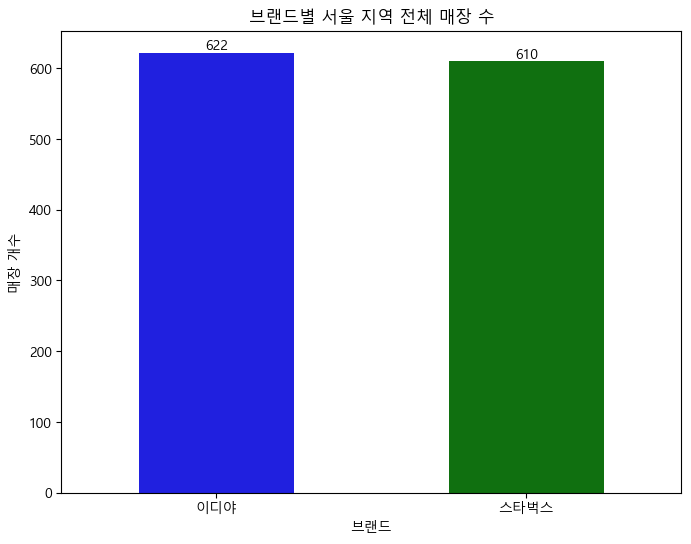

In [17]:
# 구별 매장 수 차이 1
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=brand_df, x=brand_df['brand'], y=brand_df['count'], palette={'스타벅스': 'green', '이디야': 'blue'}, width=0.5)

# 그래프 위에 수치 표시
for container in ax.containers:
    ax.bar_label(container)

# 그래프 제목, x축, y축 라벨 설정
plt.title('브랜드별 서울 지역 전체 매장 수')
plt.xlabel('브랜드')
plt.ylabel('매장 개수')
plt.show()

#### 3-1. 1) 구별 매장 수 - 막대그래프로 표현1

C:\Users\mua19\miniconda3\envs\mml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mua19\miniconda3\envs\mml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mua19\miniconda3\envs\mml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mua19\miniconda3\envs\mml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

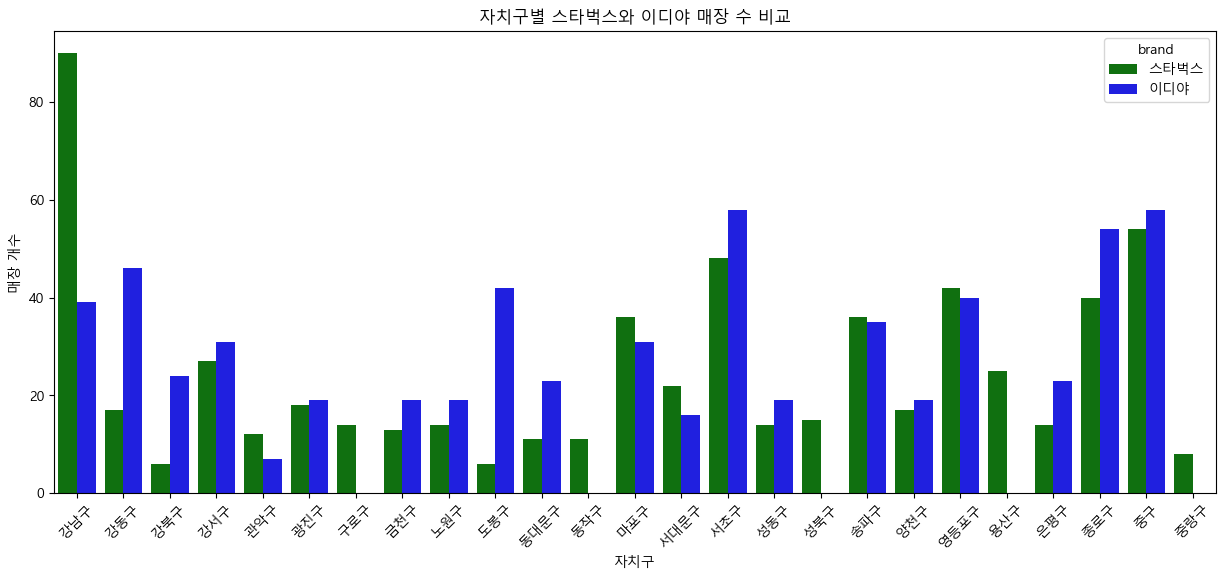

In [18]:
# 구별 매장 수 차이 1
plt.figure(figsize=(15, 6))
sns.barplot(data=df1, x=df1['gu'], y=df1['shop_count'], hue='brand', palette={'스타벅스': 'green', '이디야': 'blue'})
# 그래프 제목, x축, y축 라벨 설정
plt.title('자치구별 스타벅스와 이디야 매장 수 비교')
plt.xlabel('자치구')
plt.xticks(rotation=45)
plt.ylabel('매장 개수')
plt.show()

#### 3-1. 2) 구별 매장 수 - 막대그래프로 표현1 - 전처리

C:\Users\mua19\miniconda3\envs\mml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mua19\miniconda3\envs\mml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mua19\miniconda3\envs\mml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mua19\miniconda3\envs\mml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

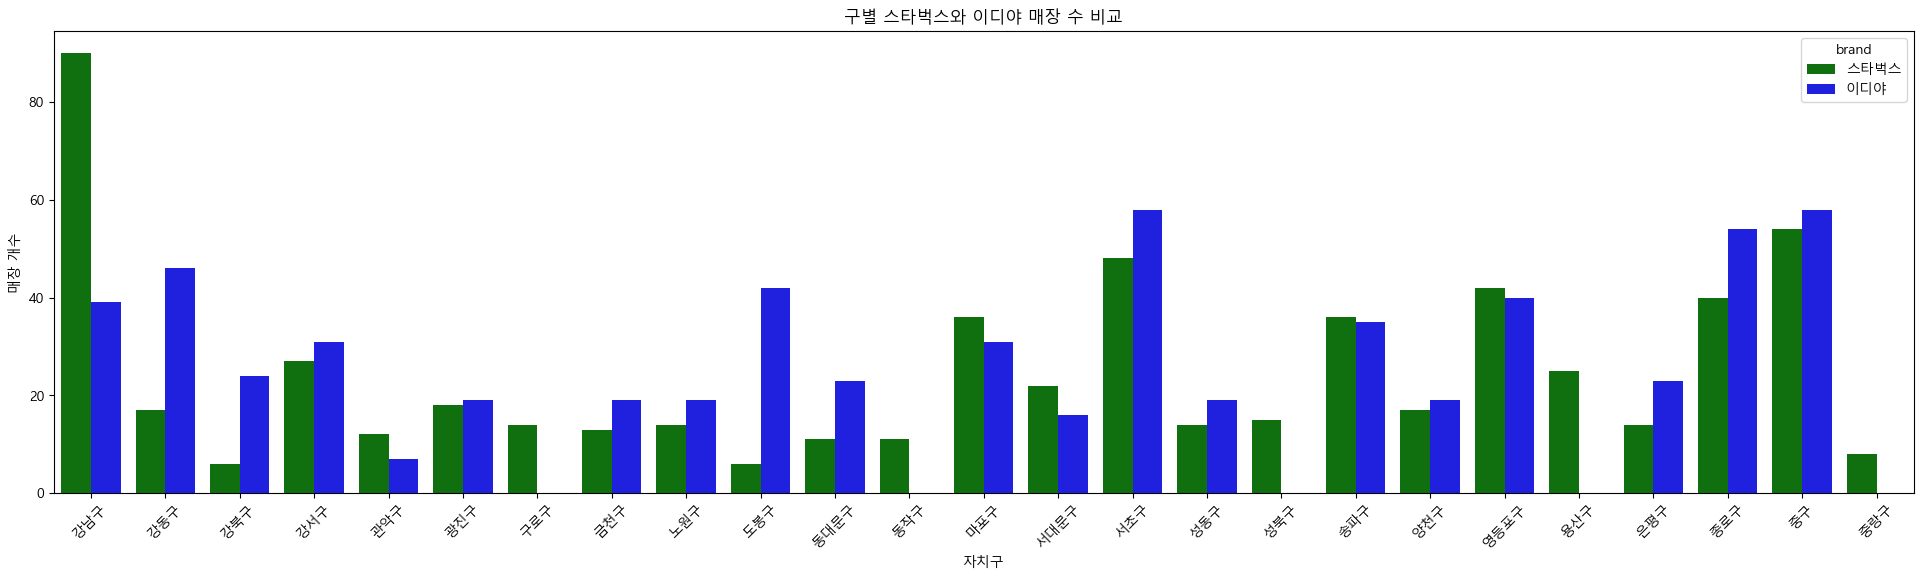

In [19]:
# 구별 매장 수 차이 1
plt.figure(figsize=(24, 6))
sns.barplot(data=df1, x=df1['gu'], y=df1['shop_count'], hue='brand', palette={'스타벅스': 'green', '이디야': 'blue'})
# 그래프 제목, x축, y축 라벨 설정
plt.title('구별 스타벅스와 이디야 매장 수 비교')
plt.xlabel('자치구')
plt.xticks(rotation=45)
plt.ylabel('매장 개수')
plt.show()

#### 3-1) 구별 매장 수 - 막대그래프로 표현2

C:\Users\mua19\miniconda3\envs\mml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mua19\miniconda3\envs\mml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mua19\miniconda3\envs\mml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mua19\miniconda3\envs\mml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

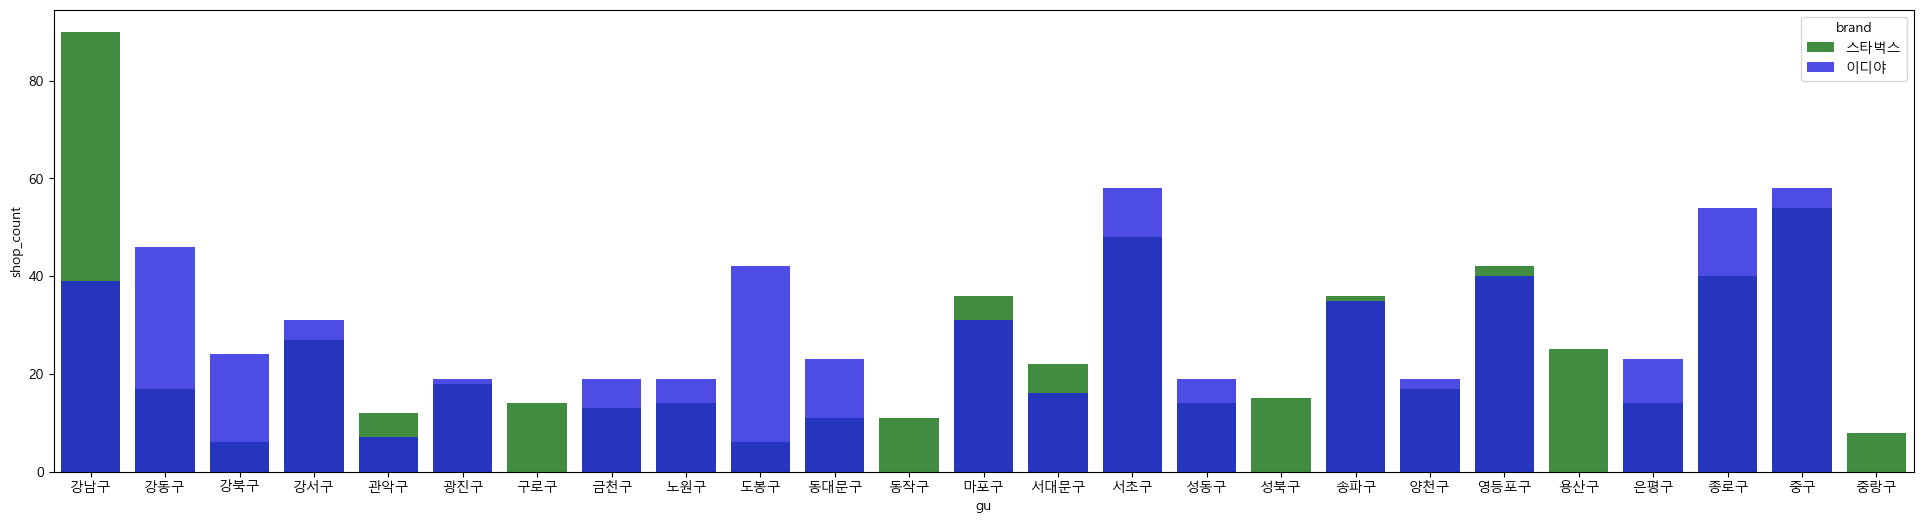

In [20]:
# 구별 매장 수 차이 2
plt.figure(figsize=(24, 6))
sns.barplot(data=df1, x=df1['gu'], y=df1['shop_count'], hue='brand', dodge=False, alpha=0.8, palette={'스타벅스': 'green', '이디야': 'blue'})
plt.show()
# dodge라는 옵션을 주게 되면 그래프를 겹쳐서 그릴 수 있음

- 강남구 관악구 구로구 동작구 마포구 서대문구 성북구 송파구 영등포구 용산구 중랑구에서 스타벅스 매장이 더 많다는 것을 확인할 수 있다.
- 강서구 광진구 양천구는 스타벅스와 이디야 매장의 비율이 비슷한 지역인 것을 확인할 수 있다.
- 15개 지역을 제외하고는, 스타벅스보다 이디야 매장이 고른 지역에 분포되어 있는 것을 볼 수 있다.

- 위의 연한 파란색은 이디야 매장 수의 변동성을 나타내는 것으로, 즉 오차

#### 3-2. 구별 매장 수 - 꺽은선그래프로 표현

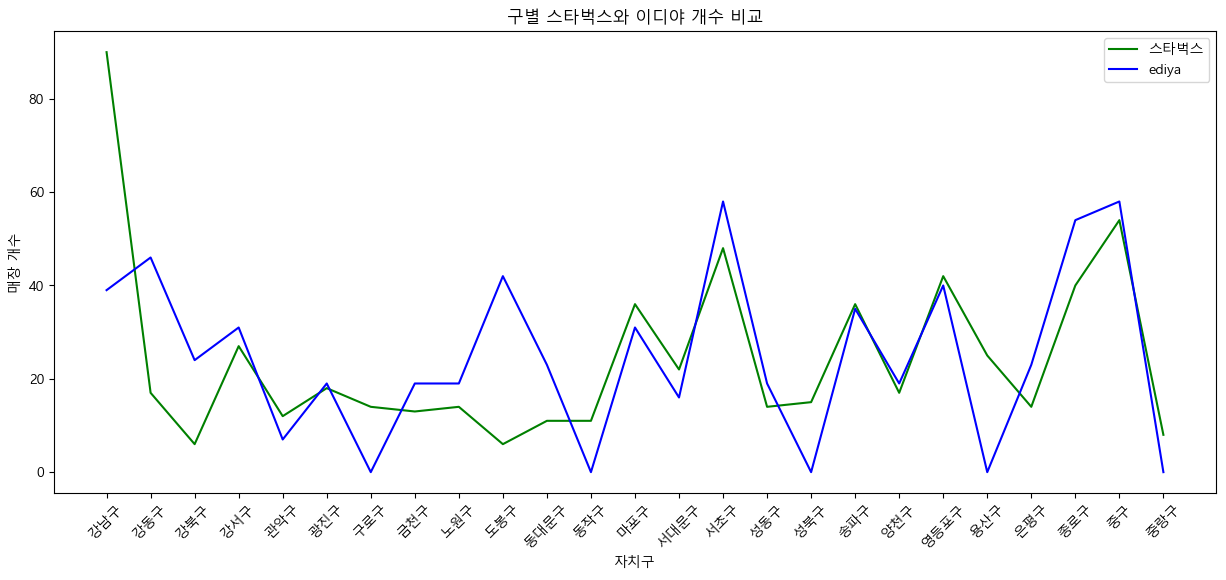

In [21]:
plt.figure(figsize=(15,6))
# 첫 번째 선 그래프 그리기
plt.plot(df_gu['gu'], df_gu['스타벅스'], label='스타벅스', color='green')

# 두 번째 선 그래프 그리기
plt.plot(df_gu['gu'], df_gu['이디야'], label='ediya', color='blue')

# 그래프 제목, x축, y축 라벨 설정
plt.title('구별 스타벅스와 이디야 개수 비교')
plt.xlabel('자치구')
plt.xticks(rotation=45)
plt.ylabel('매장 개수')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

## 2-2. 지점 간 거리 구하기

```
haversine(하버사인) 정의
하버사인 공식이란?
- 평면이 아닌 둥근 지구표면에 있는 두 지점 사이의 직선 거리를 구하는 방법
```

In [22]:
# !pip install haversine

In [23]:
from haversine import haversine
from tqdm.notebook import tqdm_notebook


distance = []

for eidx, erow in tqdm_notebook(ediya_df.iterrows()):
    tmp_e = (float(erow["lat"]), float(erow["lng"]))  # Convert to float
    
    for sidx, srow in stb_df.iterrows():
        if (erow["gu"] == srow["gu"]):
            tmp_s = (float(srow["lat"]), float(srow["lng"]))  # Convert to float
            dt = haversine(tmp_e, tmp_s)
            each = {"이디야": erow["gu"], 
                    "스타벅스": srow["gu"], 
                    "차이": dt}
            distance.append(each)

0it [00:00, ?it/s]

In [24]:
distance_df = pd.DataFrame(distance)
distance_df

이디야 스타벅스        차이
0      강남구  강남구  1.721590
1      강남구  강남구  0.923082
2      강남구  강남구  0.980020
3      강남구  강남구  1.574828
4      강남구  강남구  3.447340
...    ...  ...       ...
20107  성동구  성동구  1.966319
20108  성동구  성동구  0.557724
20109  성동구  성동구  2.111305
20110  성동구  성동구  3.116182
20111  성동구  성동구  2.599054

[20112 rows x 3 columns]

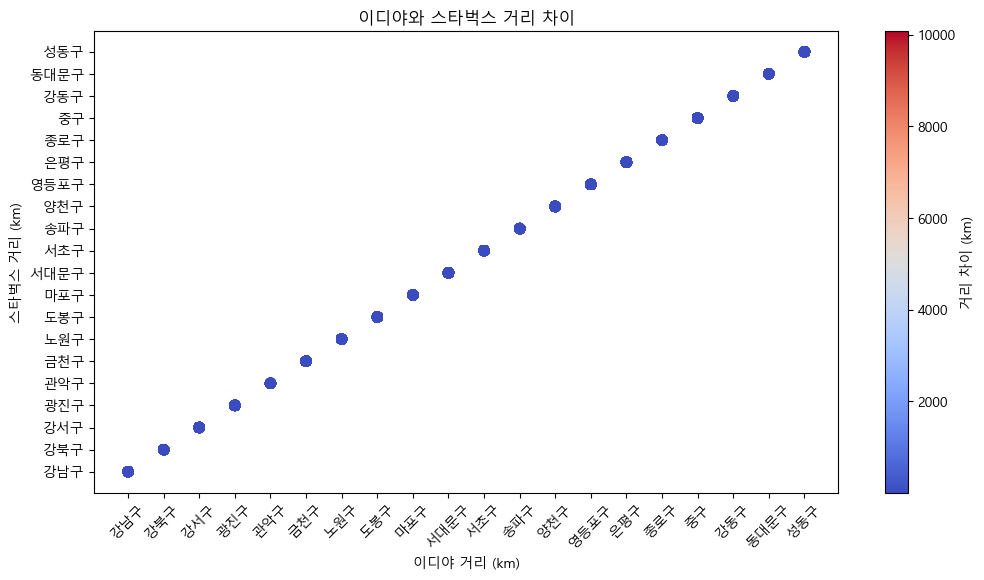

In [25]:
# 색상 팔레트 정의
cmap = sns.color_palette("coolwarm", as_cmap=True)

# distance_df는 이디야, 스타벅스, 차이

# 거리 차이를 색상으로 표현하는 산점도 생성
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    x=distance_df['이디야'],
    y=distance_df['스타벅스'],
    c=distance_df['차이'],
    cmap=cmap,
    s=50  # 마커 크기
)

# 축 이름 설정
plt.xlabel("이디야 거리 (km)")
plt.xticks(rotation=45)
plt.ylabel("스타벅스 거리 (km)")

# 컬러바 추가
cbar = plt.colorbar(scatter)
cbar.set_label("거리 차이 (km)")

# 그래프 제목 설정
plt.title("이디야와 스타벅스 거리 차이")

# 그래프 표시
plt.show()

# 3. 지도 시각화

In [26]:
# 지도 시각화 데이터 프레임(스타벅스)
stb_df_m = stb_df.groupby(['gu', 'brand'])['title'].count().reset_index(name='shop_count')
stb_df_m = stb_df_m.set_index('gu').drop('brand', axis=1)
stb_df_m.head()
# stb_df_m = stb_df_m.pivot_table(index='gu') => stb_df_m = stb_df_m.set_index('gu').drop('brand', axis=1)
# 이 부분은 pandas 버전이 올라가면서 pivot_table 동작이 달라져서 생기는 문제가 있는 것 같음.

shop_count
gu             
강남구          90
강동구          17
강북구           6
강서구          27
관악구          12

In [27]:
# 지도 시각화 데이터 프레임(스타벅스)
stb_df_m = stb_df.groupby(['gu', 'brand'])['title'].count().reset_index(name='shop_count')
stb_df_m = stb_df_m.set_index('gu').drop('brand', axis=1)
stb_df_m.head()
# stb_df_m = stb_df_m.pivot_table(index='gu') => stb_df_m = stb_df_m.set_index('gu').drop('brand', axis=1)
# 이 부분은 pandas 버전이 올라가면서 pivot_table 동작이 달라져서 생기는 문제가 있는 것 같음.

# brand컬럼을 drop하는 이유는 기존의 pivot_table에서 의도하고 있는 동작을 그대로 따라하기 위해서입니다.
# pivot_table은 기존에는 문자열로 되어있는 컬럼은 무시하는데, 해당 동작을 그대로 따라한겁니다!

shop_count
gu             
강남구          90
강동구          17
강북구           6
강서구          27
관악구          12

In [28]:
# 지도 시각화 데이터 프레임(이디)
edi_df_m = ediya_df.groupby(['gu', 'brand'])['title'].count().reset_index(name='shop_count')
edi_df_m = edi_df_m.set_index('gu').drop('brand', axis=1)
edi_df_m.head()
# edi_df_m = edi_df_m.pivot_table(index='gu') => edi_df_m = edi_df_m.set_index('gu').drop('brand', axis=1)
# 이 부분은 pandas 버전이 올라가면서 pivot_table 동작이 달라져서 생기는 문제가 있는 것 같음.

# brand컬럼을 drop하는 이유는 기존의 pivot_table에서 의도하고 있는 동작을 그대로 따라하기 위해서입니다.
# pivot_table은 기존에는 문자열로 되어있는 컬럼은 무시하는데, 해당 동작을 그대로 따라한겁니다!

shop_count
gu             
강남구          39
강동구          46
강북구          24
강서구          31
관악구           7

In [29]:
# pip install folium
# 설치 안되어 있어서 설치함

In [30]:
import folium
import json

geo_path = 'D:/0_zerobase/ds_study/data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

## 3-1. 스타벅스 매장 지도 시각화

In [31]:
sta_m = folium.Map(location=[37.5502, 126.982], zoom_start=12)

folium.Choropleth(
    geo_data=geo_str,
    data=stb_df_m['shop_count'],
    columns=[stb_df_m.index, stb_df_m['shop_count']],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(sta_m)

for idx, rows in stb_df.iterrows():
    folium.Marker(
        location=[rows['lat'], rows['lng']],
        popup=rows['title'] + "점",
        icon=folium.Icon(icon="star", color="green")
    ).add_to(sta_m)
sta_m
# Choropleth의 사용법이 최신 folium에서 바뀜
# sta_m.Choropleth(기존에 적어주신 내용 그대로)
# => folium.Choropleth(기존에 적어주신 내용 그대로).add_to(sta_m)
#    sta_m

In [32]:
sta_m = folium.Map(location=[37.5502, 126.982], zoom_start=12)

folium.Choropleth(
    geo_data=geo_str,
    data=stb_df_m['shop_count'],
    columns=[stb_df_m.index, stb_df_m['shop_count']],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(sta_m)

for idx, rows in stb_df.iterrows():
    folium.Circle(
        location=[rows['lat'], rows['lng']],
        radius=100,
        popup=rows['title'] + "점",
        color='#2c9147', fill_color='#2c9147').add_to(sta_m)
sta_m
# Choropleth의 사용법이 최신 folium에서 바뀜
# sta_m.Choropleth(기존에 적어주신 내용 그대로)
# => folium.Choropleth(기존에 적어주신 내용 그대로).add_to(sta_m)
#    sta_m

## 3-2. 이디야 매장 지도 시각화

In [33]:
edi_m = folium.Map(location=[37.5502, 126.982], zoom_start=12)

folium.Choropleth(
    geo_data=geo_str,
    data=edi_df_m['shop_count'],
    columns=[edi_df_m.index, edi_df_m['shop_count']],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(edi_m)



import math
for idx, rows in ediya_df.iterrows():
    if not math.isnan(rows['lat']):
        folium.Marker(
            location=[rows['lat'], rows['lng']],
            popup=rows['title'] + "점",
            icon=folium.Icon(icon="coffee", prefix="fa", color="blue")
        ).add_to(edi_m)

edi_m

In [34]:
edi_m = folium.Map(location=[37.5502, 126.982], zoom_start=12)

folium.Choropleth(
    geo_data=geo_str,
    data=edi_df_m['shop_count'],
    columns=[edi_df_m.index, edi_df_m['shop_count']],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(edi_m)



import math
for idx, rows in ediya_df.iterrows():
    if not math.isnan(rows['lat']):
        folium.Circle(
            location=[rows['lat'], rows['lng']],
            radius=100,
            popup=rows['title'] + "점",
            color='#5882FA', fill_color='#5882FA').add_to(edi_m)

edi_m

# Choropleth의 사용법이 최신 folium에서 바뀜
# edi_m.Choropleth(기존에 적어주신 내용 그대로)
# => folium.Choropleth(기존에 적어주신 내용 그대로).add_to(edi_m)
#    edi_m

# for idx, rows in ediya_df.iterrows():
#     folium.Circle(
#         location=[rows['lat'], rows['lng']],
#         radius=100,
#         popup=rows['title'] + "점",
#         color='#2c9147', fill_color='#2c9147').add_to(edi_m)
# 이 for문을 위의 for문으로 변경
# => lat이 nan인 경우는 제외하고 그려주게 됩니다.

## 3-3. 스타벅스 + 이디야 매장 지도 시각화

In [35]:
## 3-3. 스타벅스 + 이디야 매장 지도 시각화(스타벅스 기준)

sta_edi_m = folium.Map(location=[37.5502, 126.982], zoom_start=12)

folium.Choropleth(
    geo_data=geo_str,
    data=stb_df_m['shop_count'],
    columns=[stb_df_m.index, stb_df_m['shop_count']],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(sta_edi_m)

#스타벅스를 기준으로
for idx, rows in stb_df.iterrows():
    folium.Marker(
        location=[rows['lat'], rows['lng']],
        popup=rows['title'] + "점",
        icon=folium.Icon(icon="star", color="green")
    ).add_to(sta_edi_m)
    
#이디야를 기준으로
import math
for idx, rows in ediya_df.iterrows():
    if not math.isnan(rows['lat']):
        folium.Marker(
            location=[rows['lat'], rows['lng']],
            popup=rows['title'] + "점",
            icon=folium.Icon(icon="coffee", prefix="fa", color="blue")
        ).add_to(sta_edi_m)

sta_edi_m

In [36]:
## 3-3. 스타벅스 + 이디야 매장 지도 시각화(스타벅스 기준)

sta_edi_m = folium.Map(location=[37.5502, 126.982], zoom_start=12)

folium.Choropleth(
    geo_data=geo_str,
    data=stb_df_m['shop_count'],
    columns=[stb_df_m.index, stb_df_m['shop_count']],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(sta_edi_m)

#스타벅스를 기준으로
for idx, rows in stb_df.iterrows():
    folium.Circle(
        location=[rows['lat'], rows['lng']],
        radius=100,
        popup=rows['title'] + "점",
        color='#2c9147', fill_color='#2c9147').add_to(sta_edi_m)
    
#이디야를 기준으로
import math
for idx, rows in ediya_df.iterrows():
    if not math.isnan(rows['lat']):
        folium.Circle(
            location=[rows['lat'], rows['lng']],
            radius=100,
            popup=rows['title'] + "점",
            color='#5882FA', fill_color='#5882FA').add_to(sta_edi_m)

sta_edi_m

# 4. 분석 결과

- 강남구 관악구 구로구 동작구 마포구 서대문구 성북구 송파구 영등포구 용산구 중랑구에서 스타벅스 매장이 더 많다는 것을 확인할 수 있다.
- 강서구 광진구 양천구는 스타벅스와 이디야 매장의 비율이 비슷한 지역인 것을 확인할 수 있다.
- 15개 지역을 제외하고는, 스타벅스보다 이디야 매장이 고른 지역에 분포되어 있는 것을 볼 수 있다.
---
- 주요 상권, 회사 밀집 지역에는 스타벅스 매장이 집중되어 있는 것으로 볼 수 있다.
- 이디야는 주요 상권에서는 스타벅스 매장과 인접했다고 볼 수 있으나, 이것만으로는 이디야 스타벅스 옆에 전략적으로 위치한 것으로 판단하기에는 부족한 것으로 볼 수 있다.
- 이디야는 스타벅스와 비교해서, 서울시 기준으로 했을 때 더 넓고 고르게 분포되어 있다.
- 결론적으로, 이디야는 스타벅스 매장 옆에 위치한 전략을 고수했다고 볼 수 없다.